In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as tck
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
import numpy as np
import re

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#experiment = 'SCC418_419_IFNg'
experiment = 'INCPM_21166_DC_TCL_Tyw2'

cryptic = ["OffFrame", "UTR5", "Frameshift", "OffFrame,Extra",
  "Frameshift,Extra", "UTR5,Extra", "Extra,Frameshift", "Extra,UTR5", "Extra,OffFrame"]
proxy =["OffFrame,Extra", "Frameshift,Extra", "UTR5,Extra",
  "Extra,Frameshift", "Extra", "Extra,UTR5", "Extra,OffFrame"]

In [3]:
input_combined = '../output/integrated/' + experiment + '/combined_scan_integration.csv'
input_msf = '../output/integrated/' + experiment + '/imp_unique_scan_integration.csv'
imput_prism = '../output/integrated/' + experiment + '/denovo_unique_scan_integration.csv'

In [4]:
#########################################################################################

In [5]:
data_comb = pd.read_csv(input_combined, sep='\t', engine='python')
data_comb = data_comb[['Categories', 'Status_over_sequence', 'Best_ALC', 'Best_Q', 'BestHit_Hyperscore', 'BestHit_Deltascore']]
data_comb['Categories'] = data_comb['Categories'].apply(lambda x: 'Canonical' if x == 'CDS' else 'Proxy' if x in proxy else 'Cryptic' if x in cryptic else '?')
data_comb = data_comb[data_comb['Categories'] != '?']
data_comb['Categories'].unique()

array(['Canonical', 'Proxy', 'Cryptic'], dtype=object)

In [6]:
data_msf = pd.read_csv(input_msf, sep='\t', engine='python')
data_msf = data_msf[['CDS', 'IMP_Status_over_sequence', 'BestHit_Hyperscore', 'BestHit_Deltascore']]
data_msf[['CDS']] = data_msf[['CDS']].astype(str)
data_msf = data_msf.rename(columns={'CDS': 'Categories'})
data_msf['Categories'] = data_msf['Categories'].apply(lambda x: 'Canonical' if x != 'nan' else 'Cryptic')
data_msf['Categories'].unique()

array(['Cryptic', 'Canonical'], dtype=object)

In [7]:
data_prism = pd.read_csv(imput_prism, sep='\t', engine='python')
data_prism = data_prism[['Categories', 'Status_over_sequence', 'Best_ALC', 'Best_Q']]
data_prism['Categories'] = data_prism['Categories'].apply(lambda x: 'Canonical' if x == 'CDS' else 'Proxy' if x in proxy else 'Cryptic' if x in cryptic else '?')
data_prism = data_prism[data_prism['Categories'] != '?']
data_prism['Categories'].unique()

array(['Cryptic', 'Canonical', 'Proxy'], dtype=object)

In [8]:
##### Combined

In [9]:
# Thresholds for Hyperscore and Deltascore
thr_hs, thr_delta = (20, 4)

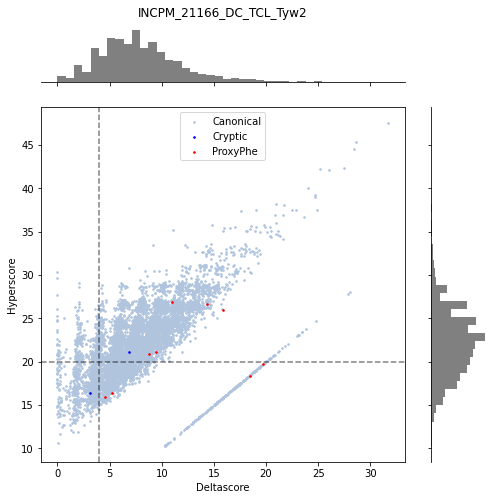

In [10]:
data2plot_canonical = data_comb[data_comb['Categories'] == 'Canonical']
data2plot_cryptic = data_comb[data_comb['Categories'] == 'Cryptic']
data2plot_proxy = data_comb[data_comb['Categories'] == 'Proxy']

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3, width_ratios=[3,3,1], height_ratios=[1,3,3])
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(
    data2plot_canonical['BestHit_Deltascore'], 
    data2plot_canonical['BestHit_Hyperscore'], 
    s=10, c='lightsteelblue', marker='.', label='Canonical'
)
ax_main.scatter(
    data2plot_cryptic['BestHit_Deltascore'], 
    data2plot_cryptic['BestHit_Hyperscore'], 
    s=10, c='blue', marker='.', label='Cryptic'
)
ax_main.scatter(
    data2plot_proxy['BestHit_Deltascore'], 
    data2plot_proxy['BestHit_Hyperscore'], 
    s=10, c='red', marker='.', label='ProxyPhe'
)

ax_main.axvline(thr_delta, c='black', linestyle='dashed', alpha=0.5)
ax_main.axhline(thr_hs, c='black', linestyle='dashed', alpha=0.5)

ax_main.set(xlabel='Deltascore', ylabel='Hyperscore')
ax_main.legend(loc='upper center')

ax_xDist.hist(data_comb['BestHit_Deltascore'], bins=40, align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_xDist.xaxis.set_tick_params(labelbottom=False)
ax_xDist.yaxis.set_tick_params(labelleft=False)
ax_xDist.set_yticks([])
ax_xDist.spines["right"].set_visible(False)
ax_xDist.spines["top"].set_visible(False)
ax_xDist.spines["left"].set_visible(False)

ax_xDist.set_title(experiment, pad=10)

ax_yDist.hist(data_comb['BestHit_Hyperscore'], bins=40, orientation='horizontal', align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)

plt.savefig('output/' + experiment + '.Combined.hyperscore_deltaScore.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.Combined.hyperscore_deltaScore.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

In [11]:
# Thresholds for ALC and Q (FDR)
thr_alc, thr_q = (80, 0.1)

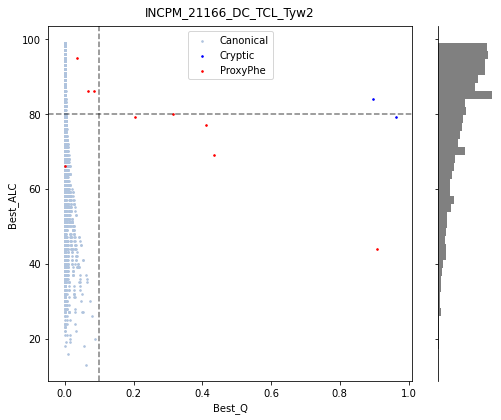

In [12]:
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3, width_ratios=[3,3,1], height_ratios=[1,3,3])
ax_main = plt.subplot(gs[1:3, :2])
#ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(
    data2plot_canonical['Best_Q'], 
    data2plot_canonical['Best_ALC'], 
    s=10, c='lightsteelblue', marker='.', label='Canonical'
)
ax_main.scatter(
    data2plot_cryptic['Best_Q'], 
    data2plot_cryptic['Best_ALC'], 
    s=10, c='blue', marker='.', label='Cryptic'
)
ax_main.scatter(
    data2plot_proxy['Best_Q'], 
    data2plot_proxy['Best_ALC'], 
    s=10, c='red', marker='.', label='ProxyPhe'
)

ax_main.axvline(thr_q, c='black', linestyle='dashed', alpha=0.5)
ax_main.axhline(thr_alc, c='black', linestyle='dashed', alpha=0.5)

ax_main.set(xlabel='Best_Q', ylabel='Best_ALC')
ax_main.legend(loc='upper center')

#ax_xDist.hist(data_comb['Best_Q'], bins=40, align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
#ax_xDist.xaxis.set_tick_params(labelbottom=False)
#ax_xDist.yaxis.set_tick_params(labelleft=False)
#ax_xDist.set_yticks([])
#ax_xDist.spines["right"].set_visible(False)
#ax_xDist.spines["top"].set_visible(False)
#ax_xDist.spines["left"].set_visible(False)

#ax_xDist.set_title(experiment + '\nthresholds: hyperscore={}, deltascore={}'.format(thr_hs, thr_delta), pad=10)
ax_main.set_title(experiment, pad=10)

ax_yDist.hist(data_comb['Best_ALC'], bins=40, orientation='horizontal', align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)

plt.savefig('output/' + experiment + '.Combined.Best_ALC_Best_Q.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.Combined.Best_ALC_Best_Q.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

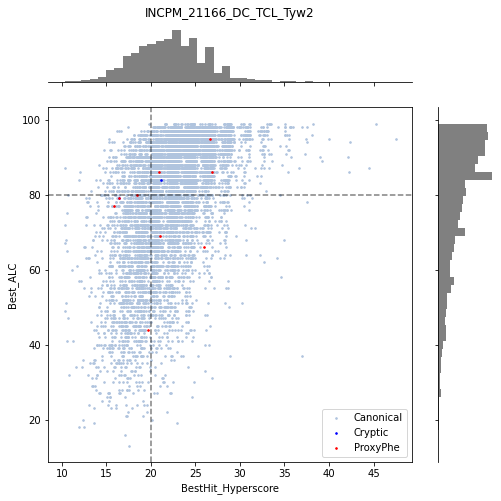

In [13]:
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3, width_ratios=[3,3,1], height_ratios=[1,3,3])
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(
    data2plot_canonical['BestHit_Hyperscore'], 
    data2plot_canonical['Best_ALC'], 
    s=10, c='lightsteelblue', marker='.', label='Canonical'
)
ax_main.scatter(
    data2plot_cryptic['BestHit_Hyperscore'], 
    data2plot_cryptic['Best_ALC'], 
    s=10, c='blue', marker='.', label='Cryptic'
)
ax_main.scatter(
    data2plot_proxy['BestHit_Hyperscore'], 
    data2plot_proxy['Best_ALC'], 
    s=10, c='red', marker='.', label='ProxyPhe'
)

ax_main.axvline(thr_hs, c='black', linestyle='dashed', alpha=0.5)
ax_main.axhline(thr_alc, c='black', linestyle='dashed', alpha=0.5)

ax_main.set(xlabel='BestHit_Hyperscore', ylabel='Best_ALC')
ax_main.legend(loc='lower right')

ax_xDist.hist(data_comb['BestHit_Hyperscore'], bins=40, align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_xDist.xaxis.set_tick_params(labelbottom=False)
ax_xDist.yaxis.set_tick_params(labelleft=False)
ax_xDist.set_yticks([])
ax_xDist.spines["right"].set_visible(False)
ax_xDist.spines["top"].set_visible(False)
ax_xDist.spines["left"].set_visible(False)

ax_xDist.set_title(experiment, pad=10)

ax_yDist.hist(data_comb['Best_ALC'], bins=40, orientation='horizontal', align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)

plt.savefig('output/' + experiment + '.Combined.Best_ALC_Best_Hyperscore.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.Combined.Best_ALC_Best_Hyperscore.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

In [14]:
##### MSF unique

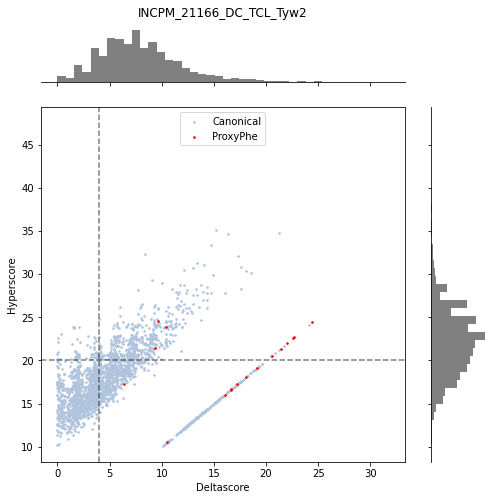

In [15]:
data2plot_canonical = data_msf[data_msf['Categories'] == 'Canonical']
data2plot_cryptic = data_msf[data_msf['Categories'] == 'Cryptic']
#data2plot_proxy = data_msf[data_msf['Categories'] == 'Proxy']

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3, width_ratios=[3,3,1], height_ratios=[1,3,3])
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(
    data2plot_canonical['BestHit_Deltascore'], 
    data2plot_canonical['BestHit_Hyperscore'], 
    s=10, c='lightsteelblue', marker='.', label='Canonical'
)
ax_main.scatter(
    data2plot_cryptic['BestHit_Deltascore'], 
    data2plot_cryptic['BestHit_Hyperscore'], 
    s=10, c='red', marker='.', label='ProxyPhe'
)
#ax_main.scatter(
#    data2plot_proxy['Best_Deltascore'], 
#    data2plot_proxy['Best_Hyperscore'], 
#    s=10, c='red', marker='.', label='ProxyPhe'
#)

ax_main.axvline(thr_delta, c='black', linestyle='dashed', alpha=0.5)
ax_main.axhline(thr_hs, c='black', linestyle='dashed', alpha=0.5)

ax_main.set(xlabel='Deltascore', ylabel='Hyperscore')
ax_main.legend(loc='upper center')

ax_xDist.hist(data_comb['BestHit_Deltascore'], bins=40, align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_xDist.xaxis.set_tick_params(labelbottom=False)
ax_xDist.yaxis.set_tick_params(labelleft=False)
ax_xDist.set_yticks([])
ax_xDist.spines["right"].set_visible(False)
ax_xDist.spines["top"].set_visible(False)
ax_xDist.spines["left"].set_visible(False)

ax_xDist.set_title(experiment, pad=10)

ax_yDist.hist(data_comb['BestHit_Hyperscore'], bins=40, orientation='horizontal', align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)

plt.savefig('output/' + experiment + '.MSF_unique.hyperscore_deltaScore.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.MSF_unique.hyperscore_deltaScore.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

In [16]:
##### PRISM unique

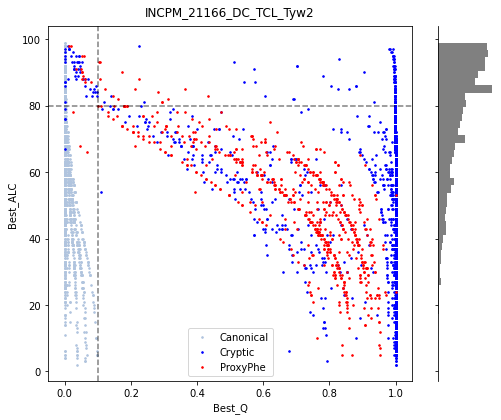

In [17]:
data2plot_canonical = data_prism[data_prism['Categories'] == 'Canonical']
data2plot_cryptic = data_prism[data_prism['Categories'] == 'Cryptic']
data2plot_proxy = data_prism[data_prism['Categories'] == 'Proxy']

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3, width_ratios=[3,3,1], height_ratios=[1,3,3])
ax_main = plt.subplot(gs[1:3, :2])
#ax_xDist = plt.subplot(gs[0, :2], sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2], sharey=ax_main)

ax_main.scatter(
    data2plot_canonical['Best_Q'], 
    data2plot_canonical['Best_ALC'], 
    s=10, c='lightsteelblue', marker='.', label='Canonical'
)
ax_main.scatter(
    data2plot_cryptic['Best_Q'], 
    data2plot_cryptic['Best_ALC'], 
    s=10, c='blue', marker='.', label='Cryptic'
)
ax_main.scatter(
    data2plot_proxy['Best_Q'], 
    data2plot_proxy['Best_ALC'], 
    s=10, c='red', marker='.', label='ProxyPhe'
)

ax_main.axvline(thr_q, c='black', linestyle='dashed', alpha=0.5)
ax_main.axhline(thr_alc, c='black', linestyle='dashed', alpha=0.5)

ax_main.set(xlabel='Best_Q', ylabel='Best_ALC')
ax_main.legend(loc='lower center')

#ax_xDist.hist(data_comb['Best_Q'], bins=40, align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
#ax_xDist.xaxis.set_tick_params(labelbottom=False)
#ax_xDist.yaxis.set_tick_params(labelleft=False)
#ax_xDist.set_yticks([])
#ax_xDist.spines["right"].set_visible(False)
#ax_xDist.spines["top"].set_visible(False)
#ax_xDist.spines["left"].set_visible(False)

#ax_xDist.set_title(experiment + '\nthresholds: hyperscore={}, deltascore={}'.format(thr_hs, thr_delta), pad=10)
ax_main.set_title(experiment, pad=10)

ax_yDist.hist(data_comb['Best_ALC'], bins=40, orientation='horizontal', align='mid', color='grey')
# Hide X and Y axes ticks and labels marks
ax_yDist.xaxis.set_tick_params(labelbottom=False)
ax_yDist.yaxis.set_tick_params(labelleft=False)
ax_yDist.set_xticks([])
ax_yDist.spines["right"].set_visible(False)
ax_yDist.spines["top"].set_visible(False)
ax_yDist.spines["bottom"].set_visible(False)

plt.savefig('output/' + experiment + '.PRISM_unique.Best_ALC_Best_Q.png', dpi=600, facecolor='white', bbox_inches='tight')
plt.savefig('output/' + experiment + '.PRISM_unique.Best_ALC_Best_Q.pdf', dpi=600, facecolor='white', bbox_inches='tight')

plt.show()

In [18]:
################### EXAMPLES ###################

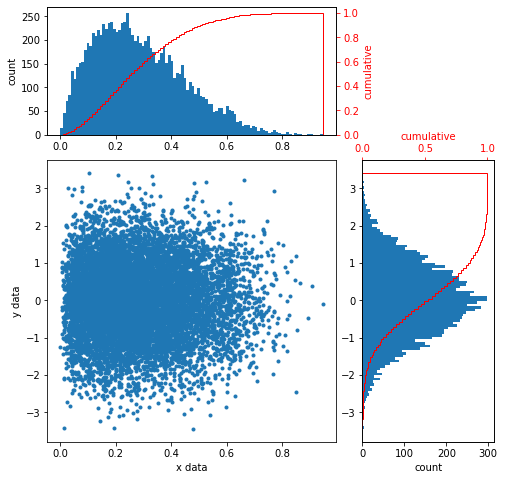

In [19]:
x = np.random.beta(2,5,size=int(1e4))
y = np.random.randn(int(1e4))

fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(3, 3)
ax_main = plt.subplot(gs[1:3, :2])
ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)
    
ax_main.scatter(x,y,marker='.')
ax_main.set(xlabel="x data", ylabel="y data")

ax_xDist.hist(x,bins=100,align='mid')
ax_xDist.set(ylabel='count')
ax_xCumDist = ax_xDist.twinx()
ax_xCumDist.hist(x,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid')
ax_xCumDist.tick_params('y', colors='r')
ax_xCumDist.set_ylabel('cumulative',color='r')

ax_yDist.hist(y,bins=100,orientation='horizontal',align='mid')
ax_yDist.set(xlabel='count')
ax_yCumDist = ax_yDist.twiny()
ax_yCumDist.hist(y,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid',orientation='horizontal')
ax_yCumDist.tick_params('x', colors='r')
ax_yCumDist.set_xlabel('cumulative',color='r')

plt.show()

In [20]:
###############################

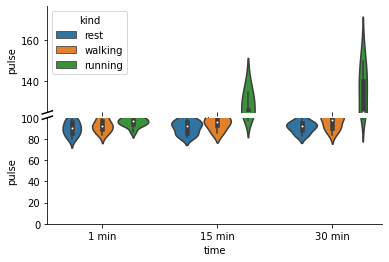

In [21]:
# If you want to draw on a subplot, you cannot use catplot, which is a figure-level function. Instead, you need to use violinplot directly. Also, if you want two different y-scales, you cannot use sharey=True when you create your subplots.

# The rest is pretty much copied/pasted from matplotlib's broken axes tutorial

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
exercise = sns.load_dataset("exercise")
f, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.05})
sns.violinplot(x="time", y="pulse", hue="kind",data=exercise, ax=ax_top)
sns.violinplot(x="time", y="pulse", hue="kind",data=exercise, ax=ax_bottom)
ax_top.set_ylim(bottom=125)   # those limits are fake
ax_bottom.set_ylim(0,100)

sns.despine(ax=ax_bottom)
sns.despine(ax=ax_top, bottom=True)

ax = ax_top
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal

#remove one of the legend
ax_bottom.legend_.remove()
plt.show()


In [22]:
###############################

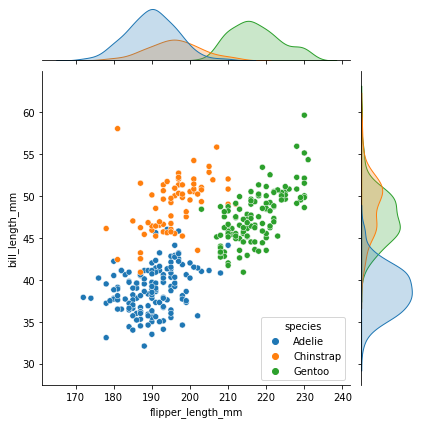

In [23]:
# JOINT PLOT
penguins = sns.load_dataset("penguins")
p = sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")